In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mydata = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [6]:
mydata.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [7]:
mydata.shape

(500, 4)

In [8]:
X = mydata.iloc[0:400, 1:3]
Y = mydata.iloc[0:400, 3]
X_test = mydata.iloc[400:, 1:3]
Y_test = mydata.iloc[400:, 3]

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
trainer = KNeighborsClassifier()

In [11]:
learner = trainer.fit(X, Y)

In [12]:
learner.score(X_test, Y_test)

0.92

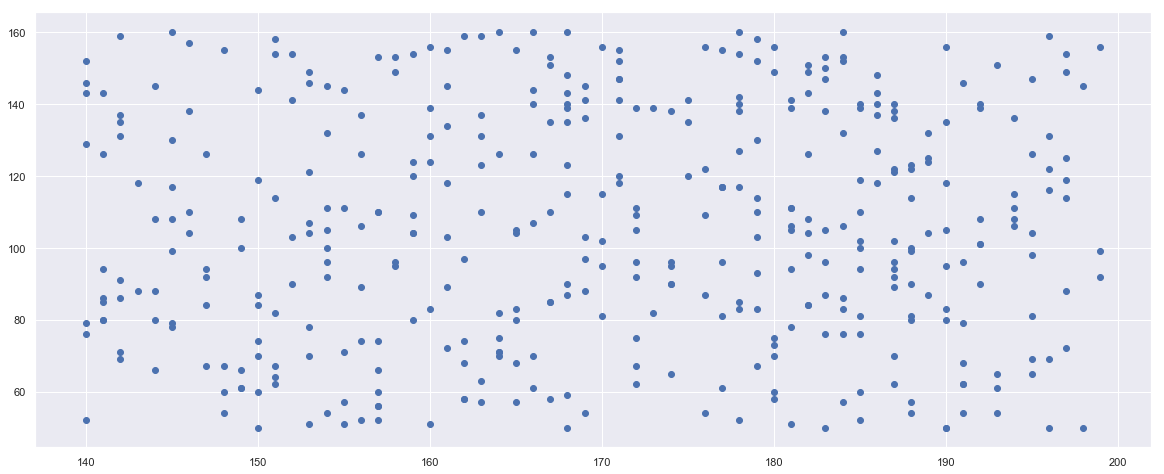

In [13]:
plt.scatter(X['Height'], X['Weight'])
plt.show()

In [14]:
mydata.loc[:100, 'Height'].head()

0    174
1    189
2    185
3    195
4    149
Name: Height, dtype: int64

In [15]:
mydata.loc[:10, ['Height', 'Weight']]

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
5,189,104
6,147,92
7,154,111
8,174,90
9,169,103


In [16]:
mydata.tail(10)

,Gender,Height,Weight,Index
490,Female,164,59,2
491,Female,146,147,5
492,Female,198,50,0
493,Female,170,53,1
494,Male,152,98,5
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [17]:
mydata.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [18]:
mydata[len(mydata):-10:-1]

,Gender,Height,Weight,Index
499,Male,173,131,5
498,Male,150,95,5
497,Female,141,136,5
496,Female,184,121,4
495,Female,150,153,5
494,Male,152,98,5
493,Female,170,53,1
492,Female,198,50,0
491,Female,146,147,5


In [19]:
mydata[-10::1]

,Gender,Height,Weight,Index
490,Female,164,59,2
491,Female,146,147,5
492,Female,198,50,0
493,Female,170,53,1
494,Male,152,98,5
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [20]:
mydata[:-11:-1]

,Gender,Height,Weight,Index
499,Male,173,131,5
498,Male,150,95,5
497,Female,141,136,5
496,Female,184,121,4
495,Female,150,153,5
494,Male,152,98,5
493,Female,170,53,1
492,Female,198,50,0
491,Female,146,147,5
490,Female,164,59,2


In [21]:
#printing sum of males having similar indexes i.e. 0,1,2,3,4,5.
male = mydata[mydata["Gender"]=='Male']
[len(male[male["Index"] == i]) for i in range(0,6)]



[6, 15, 28, 32, 59, 105]

In [22]:
# oR
index_name = pd.Series(['Extremely Weak','Weak','Normal','Overweight','Obese','Extremely obese'])

In [23]:
index_name

0     Extremely Weak
1               Weak
2             Normal
3         Overweight
4              Obese
5    Extremely obese
dtype: object

In [24]:
x_bmi= mydata.iloc[:,0:3]

In [25]:
# binary encoding 
# x_bmi[x_bmi["Gender"]=='Male']==0
# x_bmi[x_bmi["Gender"]=='Female']==1
x_bmi["Gender"]=x_bmi["Gender"].map({'Male':0,'Female':1})
x_bmi.head()

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61


In [26]:
x_input=x_bmi.values
x_input

array([[  0, 174,  96],
       [  0, 189,  87],
       [  1, 185, 110],
       ...,
       [  1, 141, 136],
       [  0, 150,  95],
       [  0, 173, 131]], dtype=int64)

In [27]:
x_input.shape

(500, 3)

In [28]:
x_train=x_input[:400]
x_test=x_input[400:]

In [29]:
print("sample in x_train",len(x_train))
print("sample in x_test",len(x_test))

sample in x_train 400
sample in x_test 100


In [30]:
y_input = mydata.iloc[:,3]
y_input.head()

0    4
1    2
2    4
3    3
4    3
Name: Index, dtype: int64

In [31]:
y_target= y_input.values
y_target

array([4, 2, 4, 3, 3, 3, 5, 5, 3, 4, 2, 4, 3, 2, 2, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 2, 3, 3, 1, 5, 5, 5, 1, 1, 5, 5, 4, 3, 4, 5, 2, 4, 5, 2, 5,
       4, 2, 4, 4, 3, 5, 5, 1, 5, 4, 4, 3, 4, 5, 3, 5, 0, 5, 0, 2, 5, 5,
       4, 2, 4, 4, 2, 4, 5, 2, 3, 4, 4, 4, 4, 0, 3, 5, 3, 4, 5, 0, 5, 5,
       5, 5, 5, 3, 3, 2, 4, 5, 4, 5, 1, 0, 4, 5, 5, 4, 4, 4, 5, 5, 4, 3,
       4, 5, 4, 2, 4, 3, 2, 5, 5, 5, 4, 4, 4, 5, 5, 4, 4, 4, 5, 2, 5, 2,
       5, 4, 5, 5, 5, 3, 5, 5, 2, 4, 5, 5, 5, 4, 3, 5, 3, 3, 0, 3, 3, 5,
       5, 4, 3, 5, 3, 4, 2, 2, 3, 5, 4, 2, 4, 5, 3, 2, 4, 5, 5, 4, 4, 4,
       4, 3, 5, 3, 3, 4, 4, 2, 3, 3, 5, 3, 5, 4, 5, 5, 4, 5, 5, 5, 4, 4,
       5, 5, 1, 3, 4, 4, 5, 4, 5, 4, 3, 4, 4, 5, 5, 5, 0, 5, 5, 5, 5, 5,
       2, 5, 4, 5, 0, 5, 3, 4, 5, 5, 4, 2, 3, 3, 4, 3, 5, 5, 2, 5, 3, 2,
       1, 5, 0, 5, 3, 5, 3, 4, 3, 5, 5, 5, 5, 2, 4, 5, 5, 4, 5, 5, 5, 2,
       4, 5, 5, 5, 5, 1, 5, 5, 4, 0, 3, 3, 4, 2, 3, 1, 1, 5, 5, 4, 4, 4,
       4, 5, 2, 5, 4, 3, 3, 4, 5, 5, 2, 4, 3, 4, 5,

In [32]:
y_train=y_target[:400]
y_test=y_target[400:]

In [33]:
print("sample in y_train",len(y_train))
print("sample in y_test",len(y_test))

sample in y_train 400
sample in y_test 100


In [34]:
# Training 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [35]:
#creating model
model.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
result = model.predict([[0,150,46]])
index_name[result]
# printing the prediction for a given input

2    Normal
dtype: object

In [37]:
# testing x_test ..y_test
Yassumed = y_test
Ypredicted = model.predict(x_test)


In [38]:
# converting into lists
Ya_list=list(Yassumed)
Yp_list=list(Ypredicted)

In [39]:
table=pd.DataFrame({"Y_assumed":Ya_list,"Y_predicted":Yp_list})

In [40]:
table.head()

,Y_assumed,Y_predicted
0,3,3
1,4,4
2,2,2
3,4,4
4,4,4


In [41]:
# accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(Yassumed,Ypredicted)*100
print("Accuracy Score is ",acc)

Accuracy Score is  92.0


In [42]:
#finding k value
k_range=range(1,21)
my_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    my_score.append(accuracy_score(y_test,y_pred))
print(my_score)

[0.9, 0.9, 0.89, 0.95, 0.92, 0.95, 0.91, 0.94, 0.94, 0.96, 0.94, 0.94, 0.93, 0.94, 0.94, 0.94, 0.94, 0.95, 0.94, 0.94]


Text(0.5, 1.0, 'Accuracy vs k value')

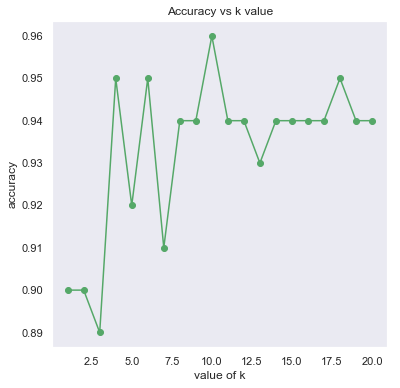

In [53]:
#plotting 
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
plt.grid()
plt.plot(k_range,my_score,'go-')
plt.xlabel("value of k")
plt.ylabel("accuracy")
plt.title("Accuracy vs k value")

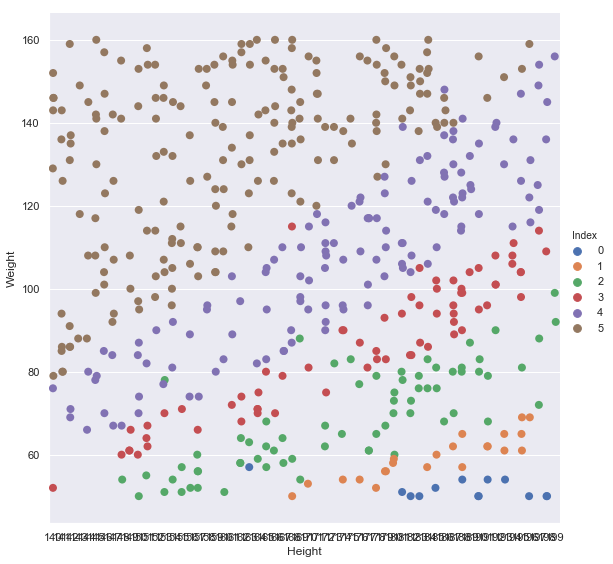

In [54]:
# seaborn plot
sns.set(rc={'figure.figsize':(30,5)})
g=sns.catplot(x='Height',y='Weight',hue='Index',data=mydata,height=8,aspect=8/8,s=8)